In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [41]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


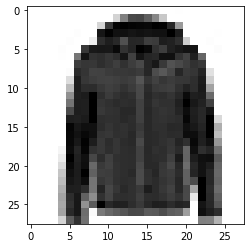

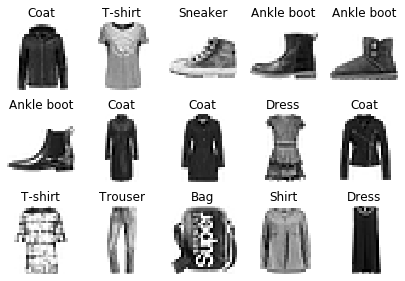

In [42]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()


show_single_image(x_train[0])


def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap='binary', interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

show_imgs(3, 5, x_train, y_train, class_names)

tf.keras.models.Sequential()

In [43]:
model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3],
#          y = [e^x1/sum, e^x2/sum, e^x3.sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[]
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

print(model.layers)
print(model.summary())



[<tensorflow.python.keras.layers.core.Flatten object at 0x7f309bd50208>, <tensorflow.python.keras.layers.core.Dense object at 0x7f3094438fd0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f3094438ba8>, <tensorflow.python.keras.layers.core.Dense object at 0x7f3094438208>]
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
____________________________

In [44]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 81us/sample - loss: 88392993.8172 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 2/10
55000/55000 [==============================] - 4s 80us/sample - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.1008
Epoch 3/10
55000/55000 [==============================] - 5s 82us/sample - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 4s 76us/sample - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.0986
Epoch 5/10
55000/55000 [==============================] - 4s 77us/sample - loss: 2.3026 - accuracy: 0.0967 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 6/10
55000/55000 [==============================] - 4s 77us/sample - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 7/10
55000/55000 [==========================

In [45]:
type(history)
print(history.history)

{'loss': [88392993.8171812, 2.302599231928045, 2.3026079119942406, 2.302595653221824, 2.302611498746005, 2.302609893556075, 2.302610451264815, 2.3025956591519443, 2.3026136815851386, 2.3026107059478758], 'accuracy': [0.09874546, 0.09932727, 0.09872727, 0.10005455, 0.096745454, 0.098945454, 0.09978182, 0.09967273, 0.09745455, 0.09874546], 'val_loss': [2.302882671356201, 2.302929517364502, 2.302830228805542, 2.3029457801818847, 2.3028356887817383, 2.3029076179504395, 2.302827814102173, 2.3027011871337892, 2.3027988960266113, 2.302785069656372], 'val_accuracy': [0.0914, 0.1008, 0.0914, 0.0986, 0.0986, 0.0914, 0.098, 0.1002, 0.1012, 0.0914]}


           loss  accuracy  val_loss  val_accuracy
0  8.839299e+07  0.098745  2.302883        0.0914
1  2.302599e+00  0.099327  2.302930        0.1008
2  2.302608e+00  0.098727  2.302830        0.0914
3  2.302596e+00  0.100055  2.302946        0.0986
4  2.302611e+00  0.096745  2.302836        0.0986
5  2.302610e+00  0.098945  2.302908        0.0914
6  2.302610e+00  0.099782  2.302828        0.0980
7  2.302596e+00  0.099673  2.302701        0.1002
8  2.302614e+00  0.097455  2.302799        0.1012
9  2.302611e+00  0.098745  2.302785        0.0914


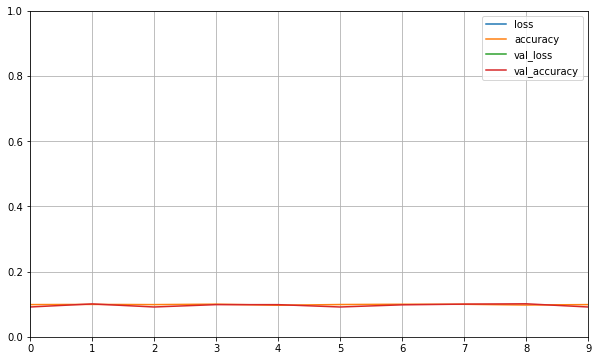

In [46]:
def plot_learning_curves(history):
    df = pd.DataFrame(history.history)
    print(df)
    
    df.plot(figsize=(10, 6))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)